# ARIMA and Seasonal ARIMA
## Autoregressive Integrated Movings Averages


###The general purpose of arima model is the:
-   Visualizzethe TIME SERIES DATA
-   Make the time series data stationary
-   Plot the correlation and auto correlation charts
-   Construct the ARIMA Model or Seasonal ARIMA based on the data
-   Use the model to make predictions



In [0]:
#import library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
data = pd.read_csv("perrin-freres-monthly-champagne-.csv",header=0)
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [24]:
data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [25]:
## Cleaning up the data
data.columns=["Months","Sales"]
data.head()

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [26]:
## Droping the last two rows
data.drop(106,axis=0,inplace=True)
data.drop(105,axis=0,inplace=True)
data.tail(3)

,Months,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [27]:
# Converrt month into Datetime
data['Months']=pd.to_datetime(data['Months'])
data.head(3)

,Months,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0


In [29]:
data.set_index("Months",inplace=True)


KeyError: ignored

In [30]:
data.head(3)

,Sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0


In [31]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## STEP 2: Visualize the Data

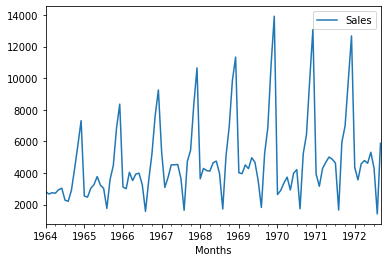

In [32]:
data.plot()

Here the data is seasonal

In [0]:
### Testing for Stationarity
 # adfuller is test use of used for check data is Stationarity or not!
 # adfuller hypothesis testing

from statsmodels.tsa.stattools import adfuller

In [0]:
test_result = adfuller(data['Sales'])

In [0]:
# H0 : It is non stationary, rejecting null hypothesis
# H1 : It is stationary, Accepting the Alternative hypothesis

def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADF Test Statistic', 'P-value','#Lags Used','Number of observation used']
  for value, label in zip(result,labels):
    print(label+' : '+str(value))
    if result[1]<=0.05:
      print("Strong evidance against the null hypothesis- H0")
    else:
      print("Weak evidance against null hypothesis- H1","It is non-stationary")

In [40]:
adfuller_test(data['Sales'])

ADF Test Statistic : -1.8335930563276193
Weak evidance against null hypothesis- H1 It is non-stationary
P-value : 0.36391577166024686
Weak evidance against null hypothesis- H1 It is non-stationary
#Lags Used : 11
Weak evidance against null hypothesis- H1 It is non-stationary
Number of observation used : 93
Weak evidance against null hypothesis- H1 It is non-stationary


### Differencing

In [0]:
data['Sales First Difference'] = data['Sales'] - data['Sales'].shift(1)

In [0]:
data['Seasonal First Diffrence '] = data['Sales']-data['Sales'].shift(12)


In [43]:
data.head(14)

,Sales,Sales First Difference,Seasonal First Diffrence
Months,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [44]:
## Again test dickey fuller test
adfuller_test(data['Seasonal First Diffrence '].dropna())

ADF Test Statistic : -7.626619157213166
Strong evidance against the null hypothesis- H0
P-value : 2.0605796968136632e-11
Strong evidance against the null hypothesis- H0
#Lags Used : 0
Strong evidance against the null hypothesis- H0
Number of observation used : 92
Strong evidance against the null hypothesis- H0


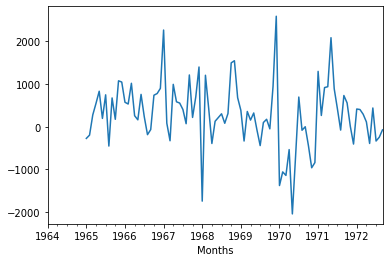

In [45]:
data['Seasonal First Diffrence '].plot()

Now data looks stationary

### Auto regressive model

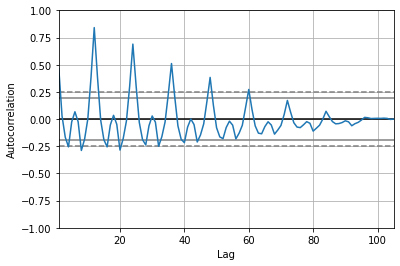

In [48]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Sales'])
plt.show()

### Final thoughts on Autocorrelation and Partial Autocoorelation
-   Identification of an AR model is often best done with the PACF.
   -   For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

-   Identification of an MA model is often best done with the ACF rather than the PACF.
   -   For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

       p,d,q p AR model lags d differencing q MA lags

In [0]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

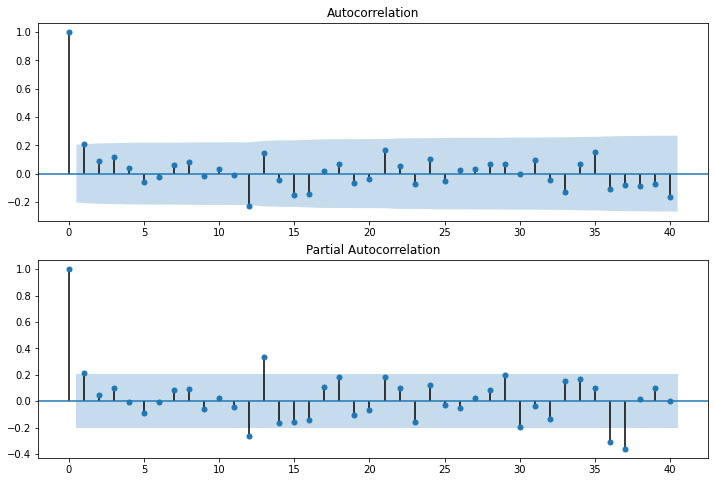

In [52]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Diffrence '].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Diffrence '].iloc[13:],lags=40,ax=ax2)

In [0]:
# For non-seasonal data
# p=1, d=1,q= 0 or 1
# Arima works well when data is non-seasonal
from statsmodels.tsa.arima_model import ARIMA

In [54]:
model = ARIMA(data['Sales'], order = (1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [55]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Tue, 26 May 2020   AIC                           1910.251
Time:                        02:43:34   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7846     12.405      1.837      0.069      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [57]:
model = sm.tsa.statespace.SARIMAX(data['Sales'],order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


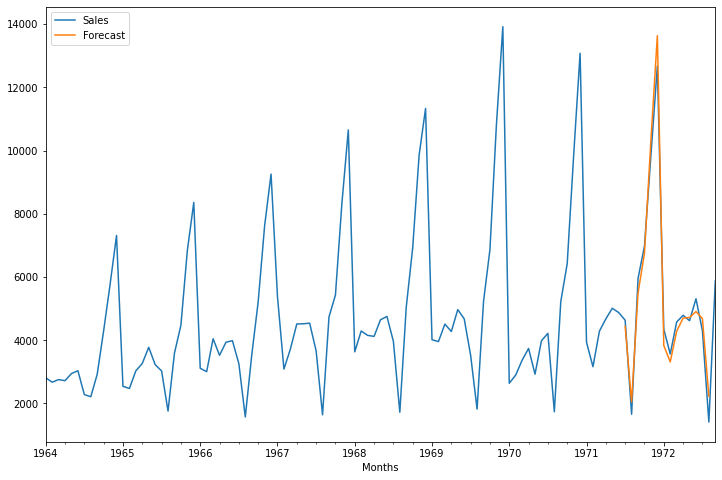

In [58]:
data['Forecast']=results.predict(start=90,end=103,dynamic=True)
data[['Sales','Forecast']].plot(figsize=(12,8))

In [0]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [0]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [62]:

future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Diffrence,Forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [0]:
future_df=pd.concat([data,future_datest_df])

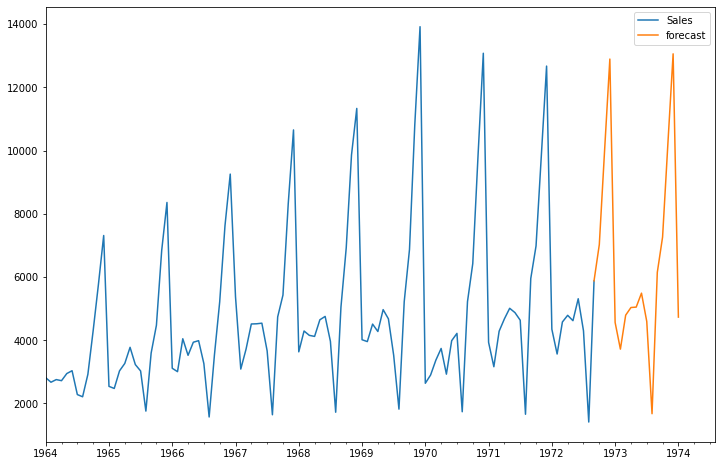

In [64]:

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))